In [1]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder

from PIL import Image
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

# tensor to pil
to_pil = transforms.ToPILImage()
os.listdir("../_data_/LITS/Training_Batch_1")


['segmentation', 'volume']

In [2]:
# decive
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# way to the data folders
folder_data = "../_data_/LITS/Training_Batch_1/volume"
folder_mask = "../_data_/LITS/Training_Batch_1/segmentation"
device

device(type='cuda', index=0)

In [3]:
from nibabel.testing import data_path

In [4]:
file = os.path.join(folder_data, 'volume-0.nii')

In [5]:
import nibabel as nib

In [6]:
img = nib.load(file)

In [7]:
img.shape

(512, 512, 75)

In [8]:
img.get_data_dtype() == np.dtype(np.int16)


True

In [9]:
data = img.get_fdata()
data.shape

(512, 512, 75)

In [10]:
type(data)

numpy.ndarray

In [11]:
hdr = img.header

In [12]:
hdr = img.header

In [13]:
hdr.get_xyzt_units()

('mm', 'sec')

In [14]:
raw = hdr.structarr
raw['xyzt_units']

array(10, dtype=uint8)

In [15]:
data_new = np.ones((32, 32, 15, 100), dtype=np.int16)
img_new = nib.Nifti1Image(data_new, np.eye(4))
img_new.get_data_dtype() == np.dtype(np.int16)

True

In [16]:
img.header.get_xyzt_units()

('mm', 'sec')

In [17]:
# img.to_filename(os.path.join('build','test4d.nii.gz'))
# nib.save(img, os.path.join('build','test4d.nii.gz'))

In [18]:
img.shape

(512, 512, 75)

In [19]:
img_data = img.get_fdata()
img_data.shape

(512, 512, 75)

In [20]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        

In [21]:
def qwe(object):
    l = []
    slice_0 = img_data[0, :, :]
    l.append(slice_0)
    slice_1 = img_data[:, 0, :]
    l.append(slice_1)
    slice_2 = img_data[:, :, object]
    l.append(slice_2)
    return l

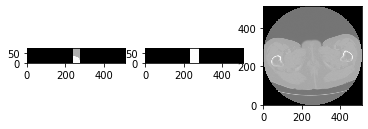

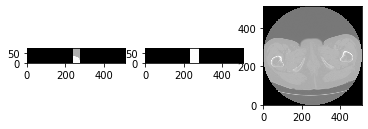

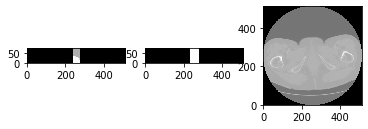

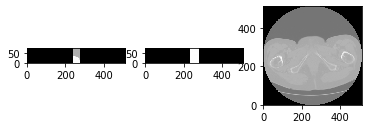

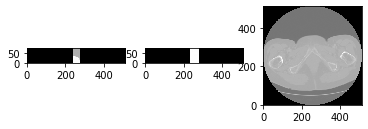

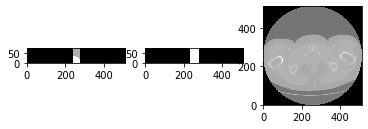

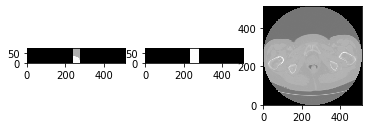

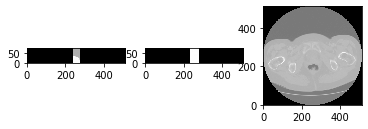

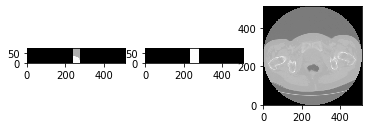

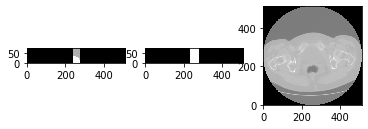

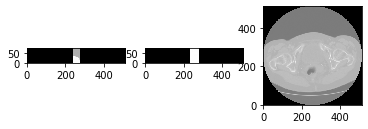

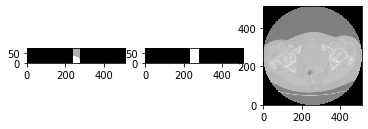

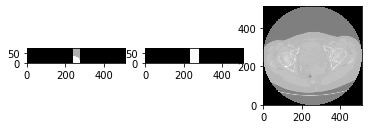

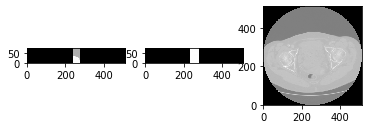

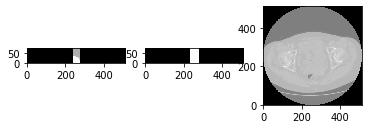

In [22]:
for i in range(15):
    show_slices(qwe(i))
